In [1]:
import os
import pandas as pd
from DOPU_given_timerange import get_cleaned_df

get_cleaned_df

df = pd.read_parquet("all_cleaned_data/all_cleaned_data.parquet")
df.head()

,VendorID,PickupDatetime,DropoffDatetime,TripDuration,PassengerCount,TripDistance,PULocationID,DOLocationID,PaymentType,FareAmount,ExtraCharges,MTATax,TipAmount,TollsAmount,ImprovementSurcharge,TotalAmount,CongestionSurcharge,AirportFee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,19.800000,1.0,1.72,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,6.600000,1.0,1.80,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,17.916667,1.0,4.70,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,8.300000,1.0,1.40,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,6.100000,1.0,0.80,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


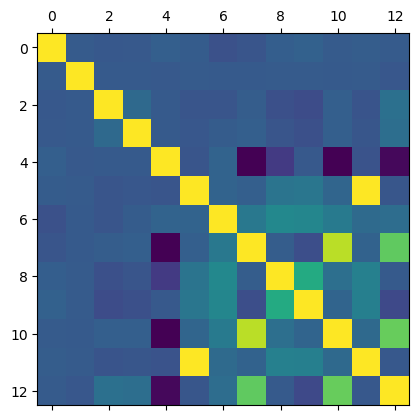

In [9]:
import matplotlib.pyplot as plt
plt.matshow(df.drop(["store_and_fwd_flag", "Airport_fee", "VendorID", "RatecodeID", "tpep_pickup_datetime", "tpep_dropoff_datetime"], axis=1).corr())
plt.show()

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

def get_cleaned_df():
    folder_path = "cleaned_data/"
    
    os.makedirs("all_cleaned_data", exist_ok=True)
    
    # Get all parquet files in the folder
    parquet_files = [f for f in os.listdir(folder_path) if f.endswith('.parquet')]
    
    # Load and concatenate them into a single DataFrame
    dataframes = [pd.read_parquet(os.path.join(folder_path, file)) for file in parquet_files]
    
    # Combine all dataframes
    df = pd.concat(dataframes, ignore_index=True) if dataframes else pd.DataFrame()
    
    df.to_parquet("all_cleaned_data/all_cleaned_data.parquet", index=False)

get_cleaned_df()
df = pd.read_parquet("all_cleaned_data/all_cleaned_data.parquet")
df.head()

,VendorID,PickupDatetime,DropoffDatetime,TripDuration,PassengerCount,TripDistance,PULocationID,DOLocationID,PaymentType,FareAmount,ExtraCharges,MTATax,TipAmount,TollsAmount,ImprovementSurcharge,TotalAmount,CongestionSurcharge,AirportFee
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,11.500000,1.0,1.98,236,239,1.0,12.8,1.0,0.5,3.61,0.0,1.0,21.66,2.75,0.0
1,2,2024-01-01 00:31:42,2024-01-01 00:52:34,20.866667,5.0,6.54,65,170,1.0,30.3,1.0,0.5,7.11,0.0,1.0,42.66,2.75,0.0
2,2,2024-01-01 00:30:21,2024-01-01 00:49:23,19.033333,1.0,3.08,74,262,1.0,19.8,1.0,0.5,3.00,0.0,1.0,28.05,2.75,0.0
3,1,2024-01-01 00:30:20,2024-01-01 00:42:12,11.866667,1.0,2.40,74,116,2.0,14.2,1.0,1.5,0.00,0.0,1.0,16.70,0.00,0.0
4,2,2024-01-01 00:32:38,2024-01-01 00:43:37,10.983333,1.0,5.14,74,243,1.0,22.6,1.0,0.5,6.28,0.0,1.0,31.38,0.00,0.0


C:\Users\xiqiz\AppData\Local\Temp\ipykernel_3988\80496454.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="PickupHour", data=df, palette="viridis")


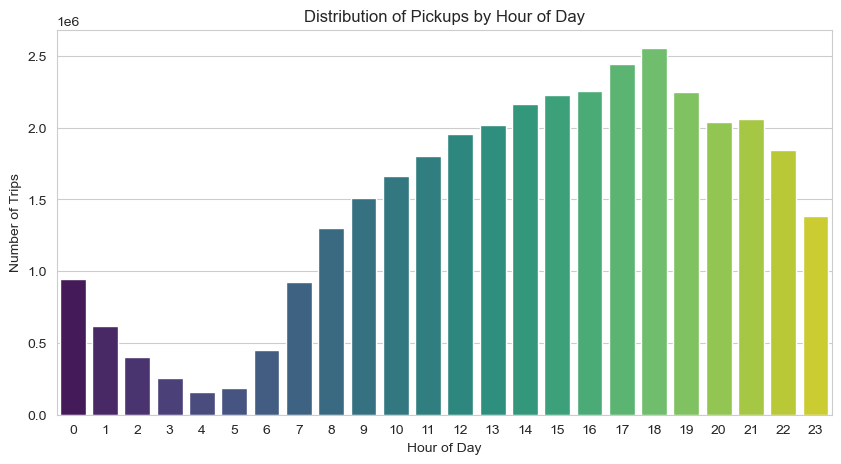

In [3]:
# -------------------------
# Analyze the distribution of PickupDatetime and DropoffDatetime to see if there are specific peak times.
# -------------------------
df["PickupDatetime"] = pd.to_datetime(df["PickupDatetime"])
df["DropoffDatetime"] = pd.to_datetime(df["DropoffDatetime"])

df["PickupHour"] = df["PickupDatetime"].dt.hour

plt.figure(figsize=(10, 5))
sns.countplot(x="PickupHour", data=df, palette="viridis")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.title("Distribution of Pickups by Hour of Day")
plt.show()


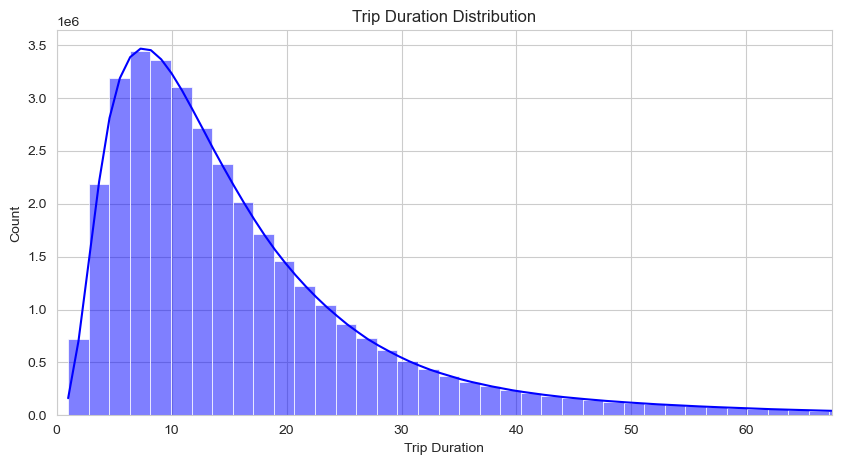

In [4]:
# -------------------------
# Trip duration distribution
# -------------------------
plt.figure(figsize=(10, 5))
sns.histplot(df["TripDuration"], bins=100, kde=True, color="blue")
plt.xlim(0, df["TripDuration"].quantile(0.99))
plt.xlabel("Trip Duration")
plt.ylabel("Count")
plt.title("Trip Duration Distribution")
plt.show()


In [13]:
print(df["TripDistance"].describe())

count    3.544538e+07
mean     3.173742e+00
std      3.976016e+00
min      5.000000e-02
25%      1.020000e+00
50%      1.700000e+00
75%      3.180000e+00
max      4.987000e+01
Name: TripDistance, dtype: float64


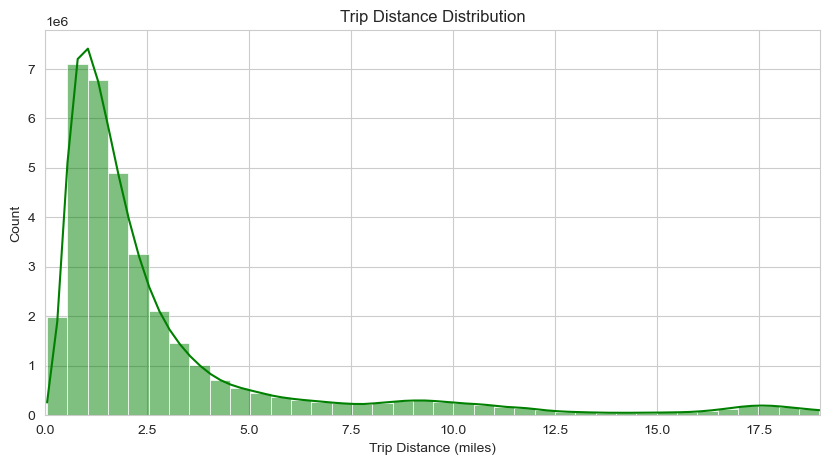

In [12]:
# -------------------------
# Trip distance distribution
# -------------------------
plt.figure(figsize=(10, 5))
sns.histplot(df["TripDistance"], bins=100, kde=True, color="green")
plt.xlim(0, df["TripDistance"].quantile(0.99))
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Count")
plt.title("Trip Distance Distribution")
plt.show()


In [5]:
print(df[["FareAmount", "TipAmount", "TotalAmount"]].describe())

         FareAmount     TipAmount   TotalAmount
count  3.544538e+07  3.544538e+07  3.544538e+07
mean   1.849190e+01  3.412520e+00  2.735774e+01
std    1.487677e+01  3.356787e+00  1.907173e+01
min    1.000000e-02  0.000000e+00  1.000000e-02
25%    9.300000e+00  1.000000e+00  1.596000e+01
50%    1.350000e+01  2.880000e+00  2.095000e+01
75%    2.120000e+01  4.400000e+00  2.988000e+01
max    9.000000e+01  1.899000e+01  1.060900e+02


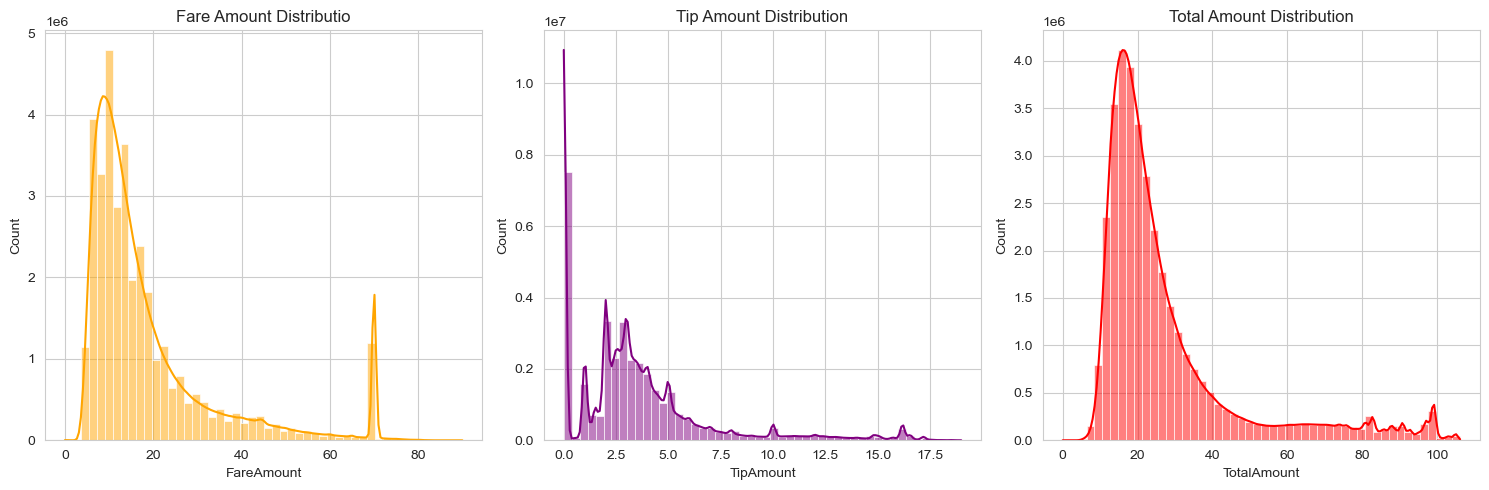

In [8]:
# -------------------------
# FareAmount, TipAmount, TotalAmount distribution
# -------------------------

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df["FareAmount"], bins=50, kde=True, ax=axes[0], color="orange")
axes[0].set_title("Fare Amount Distributio")

sns.histplot(df["TipAmount"], bins=50, kde=True, ax=axes[1], color="purple")
axes[1].set_title("Tip Amount Distribution")

sns.histplot(df["TotalAmount"], bins=50, kde=True, ax=axes[2], color="red")
axes[2].set_title("Total Amount Distribution")

plt.tight_layout()
plt.show()


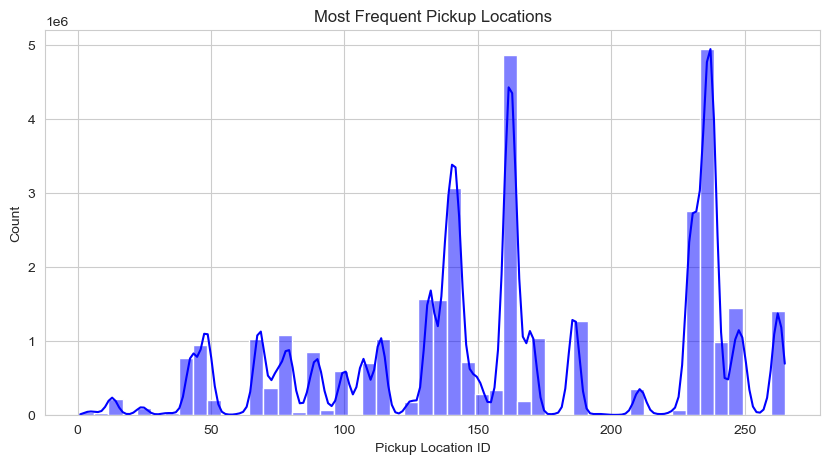

In [9]:
# -------------------------
# Popular pick-up locations
# -------------------------
plt.figure(figsize=(10, 5))
sns.histplot(df["PULocationID"], bins=50, kde=True, color="blue")
plt.xlabel("Pickup Location ID")
plt.ylabel("Count")
plt.title("Most Frequent Pickup Locations")
plt.show()


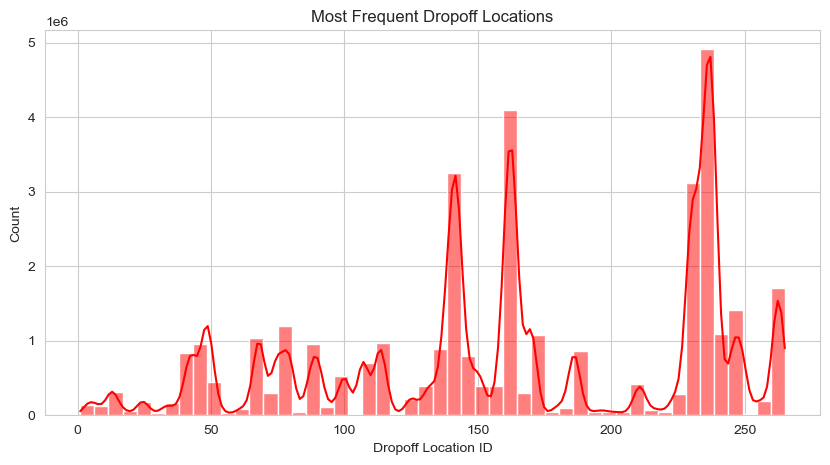

In [10]:
# -------------------------
# Popular drop-off locations
# -------------------------
plt.figure(figsize=(10, 5))
sns.histplot(df["DOLocationID"], bins=50, kde=True, color="red")
plt.xlabel("Dropoff Location ID")
plt.ylabel("Count")
plt.title("Most Frequent Dropoff Locations")
plt.show()


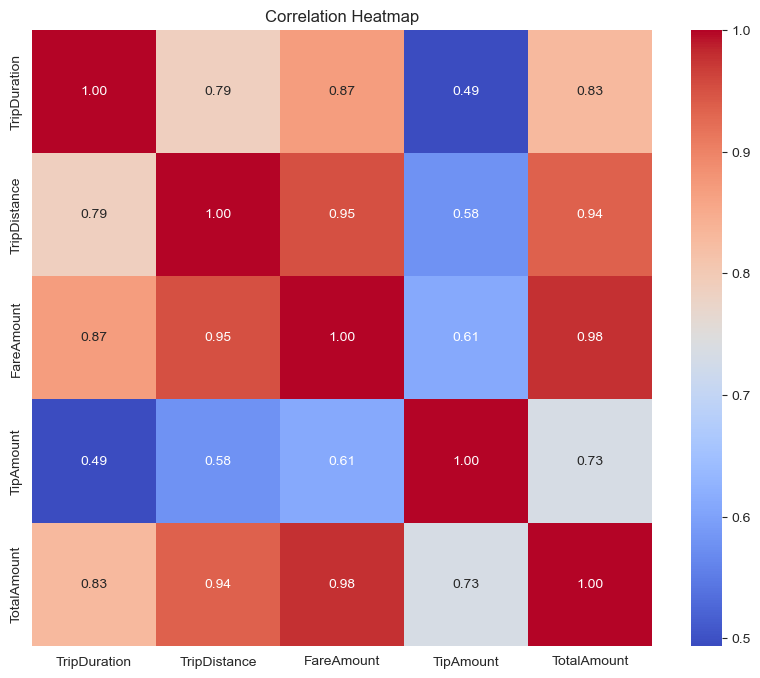

In [11]:
# -------------------------
# Correlation analysis
# -------------------------
plt.figure(figsize=(10, 8))
sns.heatmap(df[["TripDuration", "TripDistance", "FareAmount", "TipAmount", "TotalAmount"]].corr(), 
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
